In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['axes.labelpad'] = 15
plt.rcParams.update({'font.size': 16})

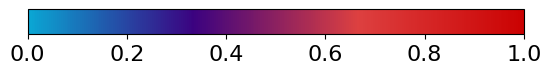

In [2]:
# Define the colors
start_color = "#0AA7D4"
middle_color = "#3B0280"
end_color = "#DD4040"
end_end_color = "#CB0202"

num_colors = 10

# Create the gradient list of colors
gradient = mcolors.LinearSegmentedColormap.from_list("custom_gradient", [start_color, middle_color, end_color, end_end_color], N=num_colors)
gradient_colors = [mcolors.rgb2hex(gradient(i/num_colors)) for i in range(num_colors)]

# Create a colormap
nml_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", gradient_colors)

# Display the colormap
plt.imshow([[0,1]], aspect='auto', cmap=nml_cmap)
plt.gca().set_visible(False)
plt.colorbar(cmap=nml_cmap, orientation="horizontal")
plt.show()

In [3]:
# Example data
real_values = np.linspace(10, 50, 101)
predicted_values = np.linspace(10, 50, 101)
real_grid, predicted_grid = np.meshgrid(real_values, predicted_values)
diff = real_values - predicted_values[::-1]

### MAE

In [4]:
mae_grid = np.abs(real_grid - predicted_grid)

In [5]:
mae = np.abs(real_values - predicted_values[::-1])

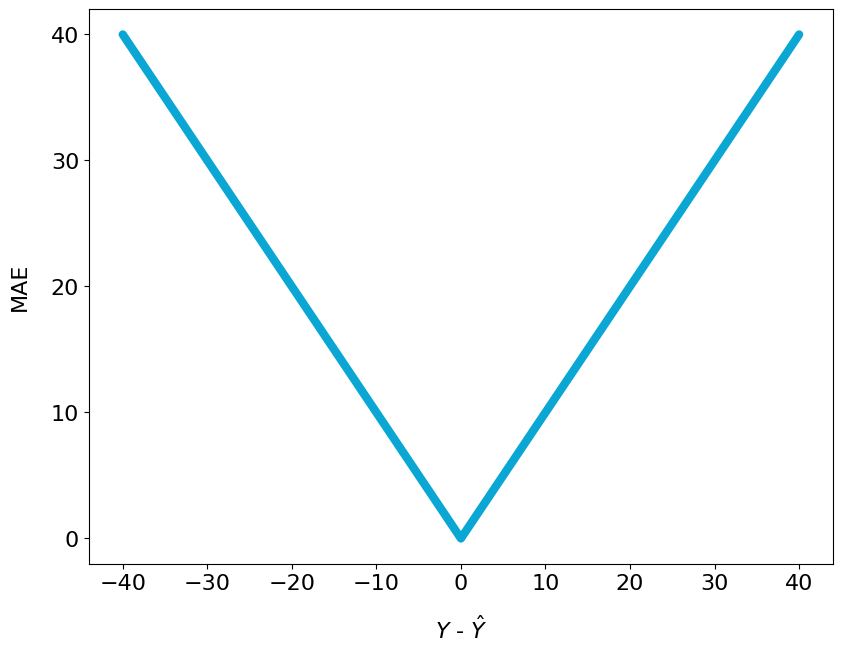

In [29]:
fig, ax = plt.subplots(figsize=(6.4*1.5, 4.8*1.5))
ax.plot(diff, mae, c=start_color, linewidth=6, solid_capstyle='round')
ax.set_ylabel('MAE')
ax.set_xlabel('$Y$ - $\hat{Y}$')
ax.set_xticks([-40, -30, -20, -10, 0, 10, 20, 30, 40])
ax.set_yticks([0, 10, 20, 30, 40])
plt.savefig('../book/figures/MAE_cross_section.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

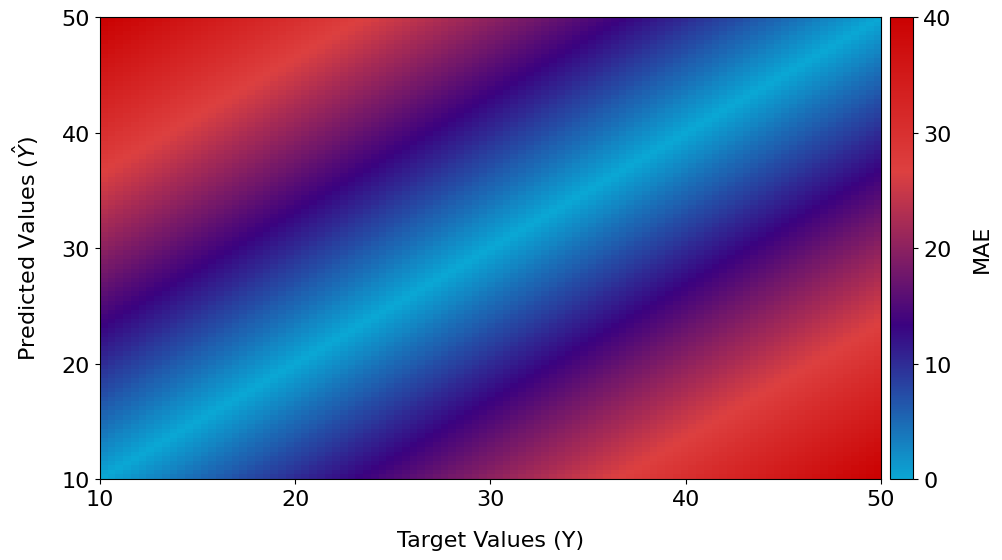

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(mae_grid, origin='lower', aspect='auto', extent=[10, 50, 10, 50], cmap=nml_cmap)
cbar = fig.colorbar(cax, pad=0.01)

cbar.ax.locator_params(nbins=4)
ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
cbar.set_label('MAE', labelpad=15)


plt.savefig('../book/figures/MAE_heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

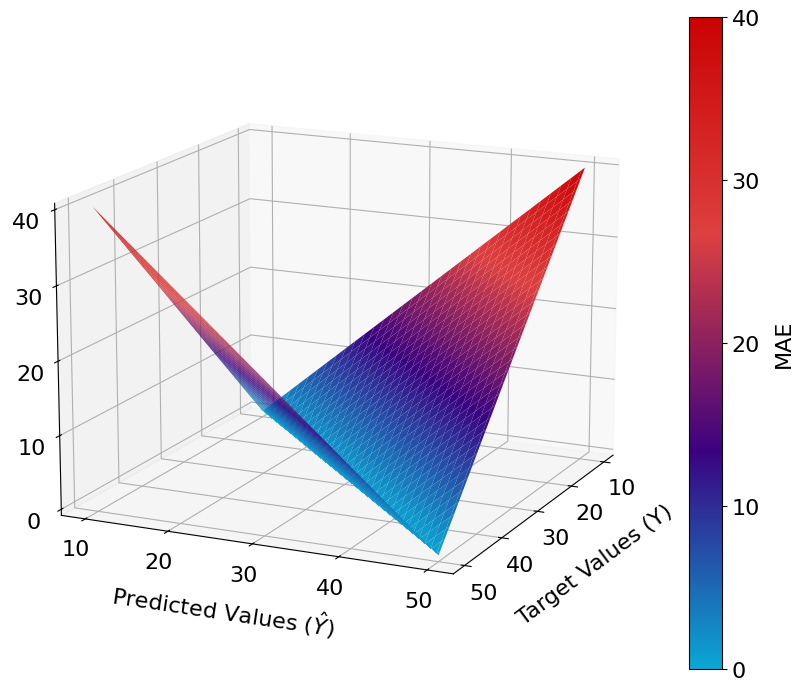

In [31]:
fig = plt.figure(figsize=(6.4*1.5, 4.8*1.5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(real_grid, predicted_grid, mae_grid, cmap=nml_cmap,
                       vmin=np.min(mae_grid), vmax=np.max(mae_grid))

cbar = fig.colorbar(surf, pad=0.03)
cbar.ax.locator_params(nbins=4)

ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_zticks([0, 10, 20, 30, 40])
ax.view_init(elev=15, azim=25)

ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
ax.set_zlabel('MAE', labelpad=10)
ax.zaxis.label.set_rotation(90)
cbar.set_label('MAE', labelpad=10)

fig.tight_layout()
plt.savefig('../book/figures/MAE_3d_surface.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


### MSE

In [10]:
# Calculate MAPE for each pair
mse_grid = (real_grid - predicted_grid) ** 2
mse = (real_values - predicted_values[::-1]) ** 2

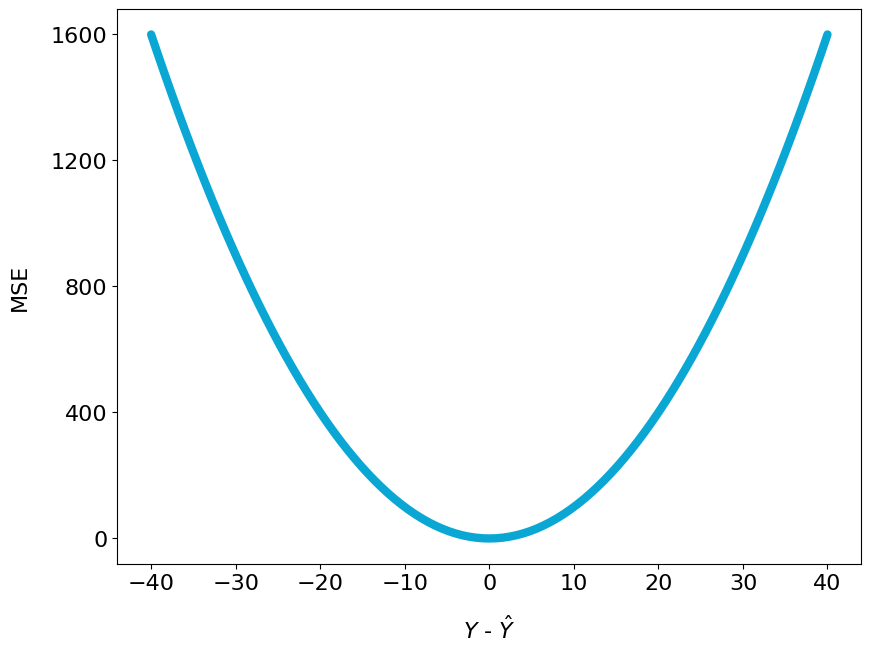

In [32]:
fig, ax = plt.subplots(figsize=(6.4*1.5, 4.8*1.5))
ax.plot(diff, mse, c=start_color, linewidth=6, solid_capstyle='round')
ax.set_ylabel('MSE')
ax.set_xlabel('$Y$ - $\hat{Y}$')
ax.set_xticks([-40, -30, -20, -10, 0, 10, 20, 30, 40])
ax.set_yticks([0, 400, 800, 1200, 1600])
plt.savefig('../book/figures/MSE_cross_section.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

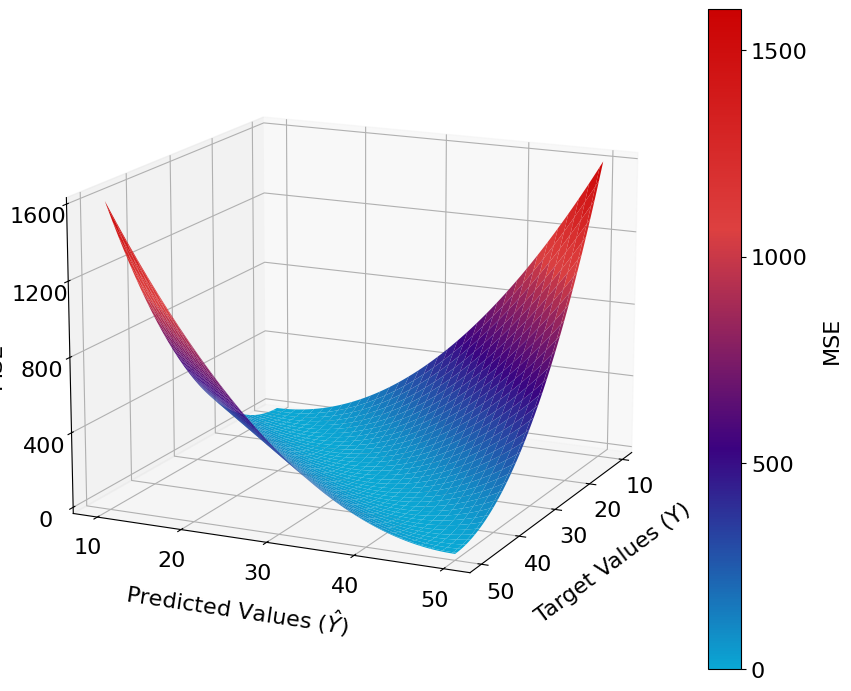

In [33]:
fig = plt.figure(figsize=(6.4*1.5, 4.8*1.5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(real_grid, predicted_grid, mse_grid, cmap=nml_cmap,
                       vmin=np.min(mse_grid), vmax=np.max(mse_grid))

cbar = fig.colorbar(surf, pad=0.03)
cbar.ax.locator_params(nbins=4)

ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_zticks([0, 400, 800, 1200, 1600])
ax.view_init(elev=15, azim=25)

ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
ax.set_zlabel('MSE', labelpad=10)
ax.zaxis.label.set_rotation(90)
cbar.set_label('MSE', labelpad=10)

fig.tight_layout()
plt.savefig('../book/figures/MSE_3d_surface.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


### MAPE

In [14]:
# Calculate MAPE for each pair
mape_grid = np.abs((real_grid - predicted_grid) / real_grid) * 100
mape = np.abs((real_values - predicted_values[::-1]) / real_values) * 100

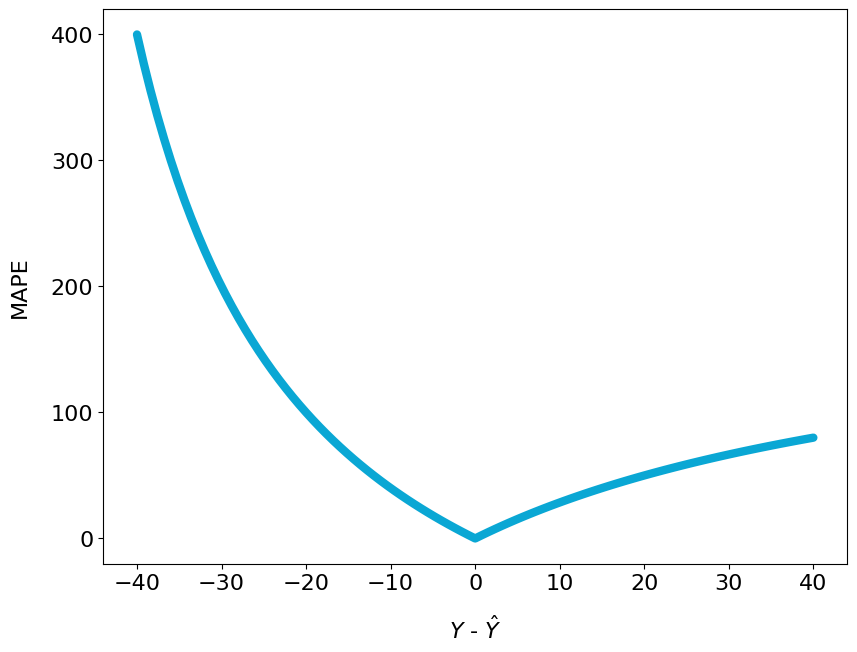

In [34]:
fig, ax = plt.subplots(figsize=(6.4*1.5, 4.8*1.5))
ax.plot(diff, mape, c=start_color, linewidth=6, solid_capstyle='round')
ax.set_ylabel('MAPE')
ax.set_xlabel('$Y$ - $\hat{Y}$')
ax.set_xticks([-40, -30, -20, -10, 0, 10, 20, 30, 40])
ax.set_yticks([0, 100, 200, 300, 400])
plt.savefig('../book/figures/MAPE_cross_section.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

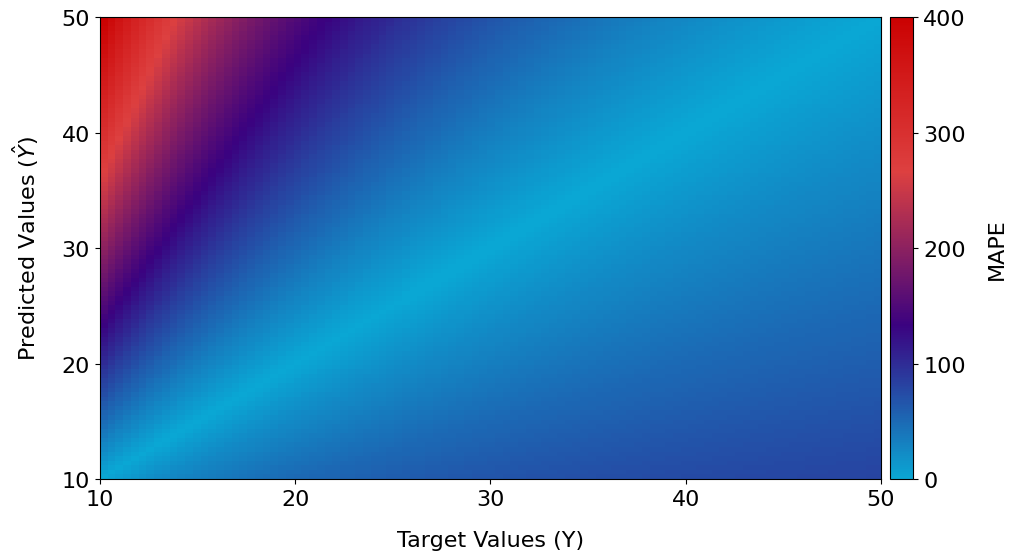

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.imshow(mape_grid, origin='lower', aspect='auto', extent=[10, 50, 10, 50], cmap=nml_cmap)
cbar = fig.colorbar(cax, pad=0.01)

cbar.ax.locator_params(nbins=4)
ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
cbar.set_label('MAPE', labelpad=15)


plt.savefig('../plots/MAPE_heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

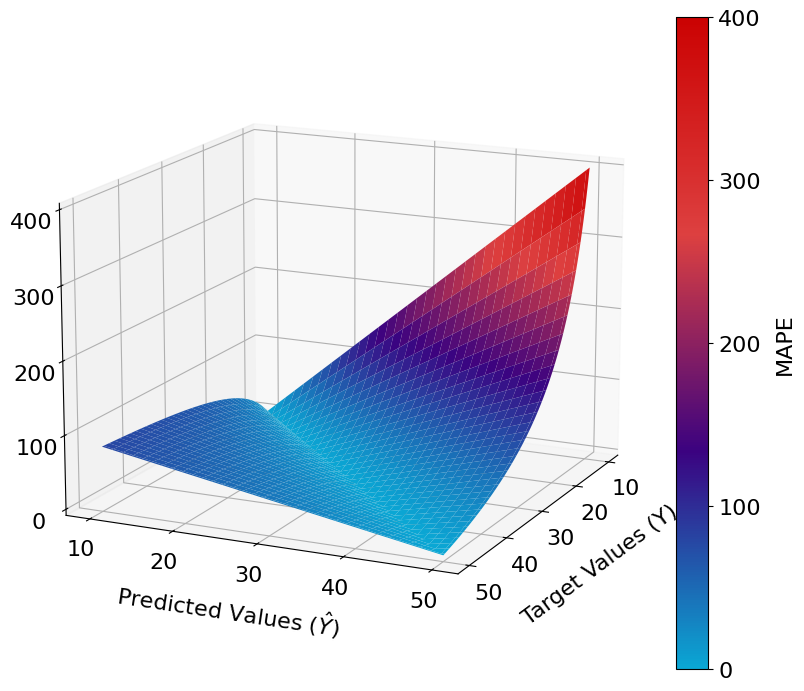

In [35]:
fig = plt.figure(figsize=(6.4*1.5, 4.8*1.5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(real_grid, predicted_grid, mape_grid, cmap=nml_cmap,
                       vmin=np.min(mape_grid), vmax=np.max(mape_grid))

cbar = fig.colorbar(surf, pad=0.01)
cbar.ax.locator_params(nbins=4)

ax.set_xticks([10, 20, 30, 40, 50])
ax.set_yticks([10, 20, 30, 40, 50])
ax.set_zticks([0, 100, 200, 300, 400])
ax.view_init(elev=15, azim=25)

ax.set_xlabel('Target Values (Y)')
ax.set_ylabel('Predicted Values ($\hat{Y}$)')
ax.set_zlabel('MAPE', labelpad=10)
ax.zaxis.label.set_rotation(90)
cbar.set_label('MAPE', labelpad=10)

fig.tight_layout()
plt.savefig('../book/figures/MAPE_3d_surface.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


### R-squared

In [36]:
real_values = np.linspace(10, 50, 101)
predicted_values = real_values + np.random.normal(0, 0.001, 101)
means = np.linspace(10, 50, 101)

real_grid, predicted_grid = np.meshgrid(real_values, predicted_values)
diff_grid = (real_grid - predicted_grid) ** 2
diff_means = (real_grid - 30) ** 2

In [37]:
r2_grid = 1 - diff_grid / diff_means
r2_grid = np.nan_to_num(r2_grid, nan=1)
r2_grid = np.clip(r2_grid, a_max=100, a_min=-100)

/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_37968/685663120.py:1: RuntimeWarning: divide by zero encountered in divide
  r2_grid = 1 - diff_grid / diff_means


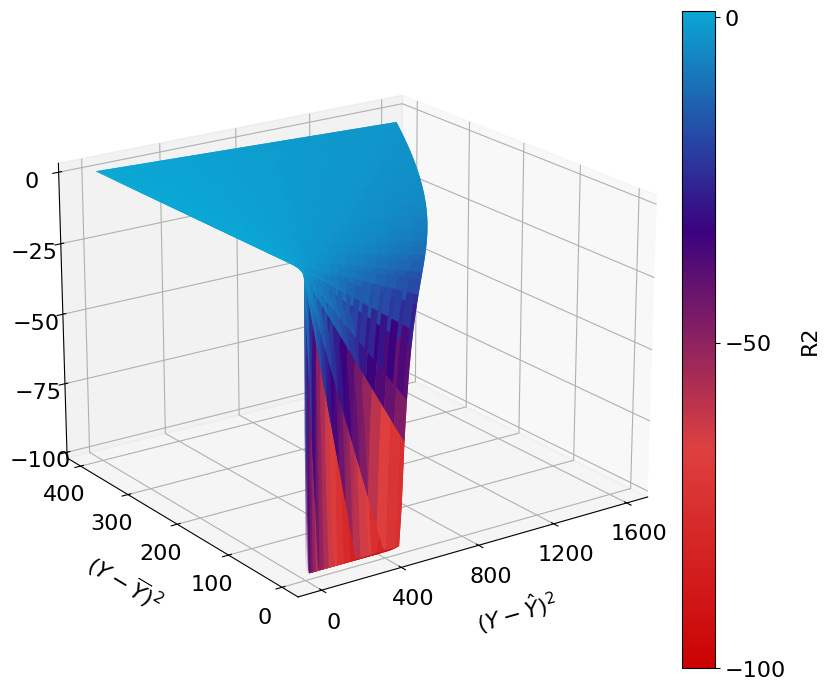

In [38]:
fig = plt.figure(figsize=(6.4*1.5, 4.8*1.5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(diff_grid, diff_means, r2_grid, cmap=nml_cmap.reversed(),
                       vmin=np.min(r2_grid), vmax=np.max(r2_grid))

cbar = fig.colorbar(surf, pad=0.01)
cbar.ax.locator_params(nbins=4)

ax.set_xticks([0, 400, 800, 1200, 1600])
ax.set_yticks([0, 100, 200, 300, 400])
ax.set_zticks([0, -25, -50, -75, -100])
ax.view_init(elev=20, azim=235)

ax.set_xlabel("$(Y - \hat{Y})^2$")
ax.set_ylabel("$(Y - \overline{Y})^2$")
ax.set_zlabel('R2', labelpad=10)
ax.zaxis.label.set_rotation(90)
cbar.set_label('R2', labelpad=10)

fig.tight_layout()
plt.savefig('../book/figures/R2_3d_surface.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [39]:
example_pred = np.array([100_000, 120_000, 140_000, 160_000])
example_y = np.array([110_000, 115_000, 130_000, 190_000])
example_y_mean = np.repeat(np.mean(example_y), len(example_y))

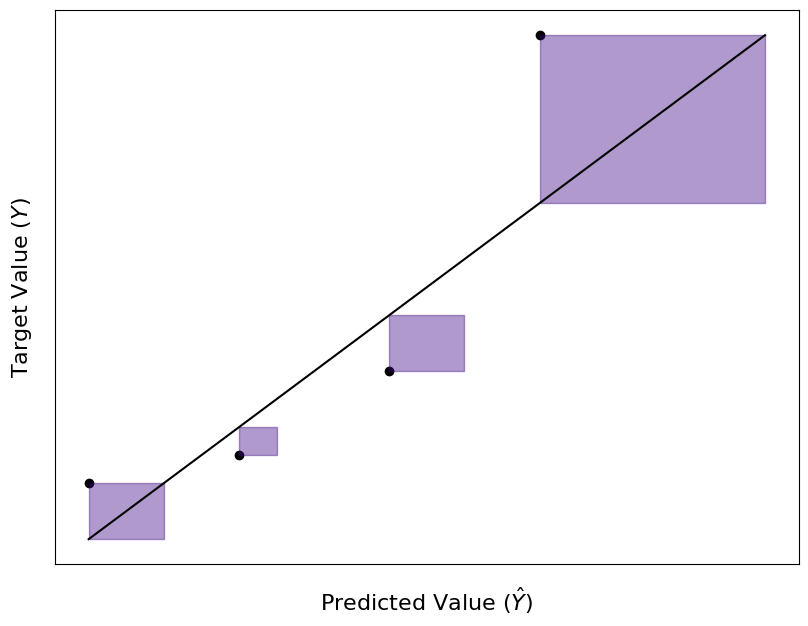

In [40]:
fig, ax = plt.subplots(figsize=(6.4*1.5, 4.8*1.5))
ax.scatter(example_pred, example_y, color="black")
ax.plot(
    [np.concatenate([example_pred, example_y]).min(), np.concatenate([example_pred, example_y]).max()],
    [np.concatenate([example_pred, example_y]).min(), np.concatenate([example_pred, example_y]).max()],
    color="black")
for i in range(len(example_pred)):
    plot_x = [example_pred[i], example_pred[i] + np.abs(example_pred[i] - example_y[i])]
    ax.fill_between(plot_x, example_pred[i], example_y[i], color=middle_color, alpha=.4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Predicted Value $(\hat{Y})$")
ax.set_ylabel("Target Value $(Y)$")
plt.show()

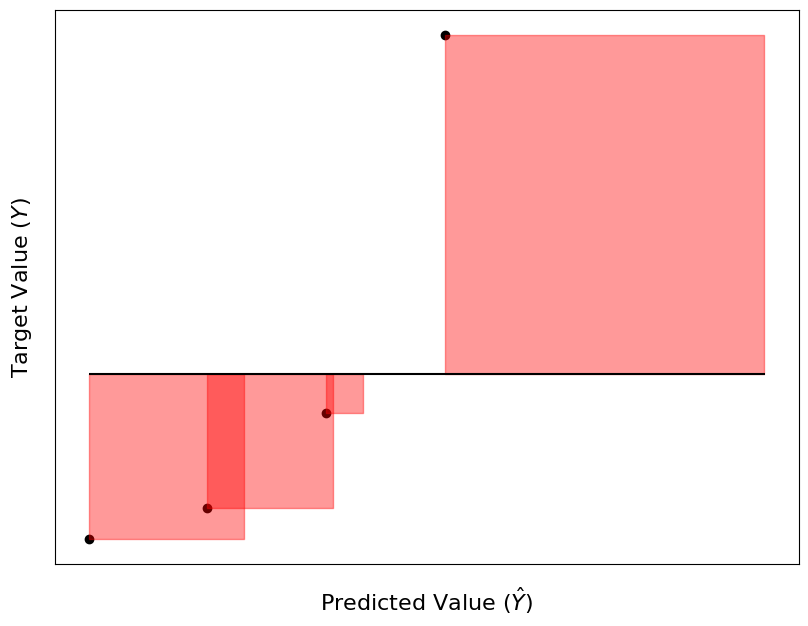

In [41]:
fig, ax = plt.subplots(figsize=(6.4*1.5, 4.8*1.5))
ax.scatter(example_pred, example_y, color="black")

ax.hlines(
    np.mean(example_y), np.concatenate([example_pred, example_y]).min(),
    np.concatenate([example_pred, example_y]).max() + 24000 , color="black",
    label="unskilled\nmodel")

for i in range(len(example_pred)):
    plot_x = [example_pred[i], example_pred[i] + np.abs(example_y_mean[i] - example_y[i])]
    ax.fill_between(plot_x, example_y[i], example_y_mean[i], color="red", alpha=.4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Predicted Value $(\hat{Y})$")
ax.set_ylabel("Target Value $(Y)$")
plt.show()

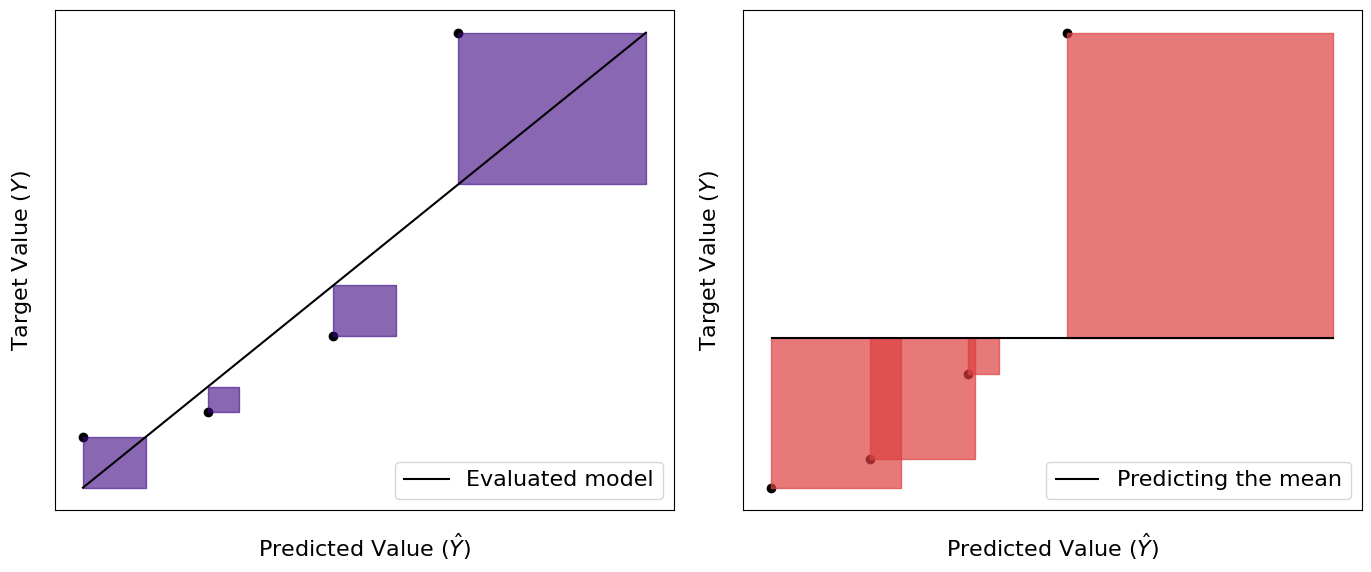

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(example_pred, example_y, color="black")
axs[0].plot(
    [np.concatenate([example_pred, example_y]).min(), np.concatenate([example_pred, example_y]).max()],
    [np.concatenate([example_pred, example_y]).min(), np.concatenate([example_pred, example_y]).max()],
    color="black", label="Evaluated model")
for i in range(len(example_pred)):
    plot_x = [example_pred[i], example_pred[i] + np.abs(example_pred[i] - example_y[i])]
    axs[0].fill_between(plot_x, example_pred[i], example_y[i], color=middle_color, alpha=.6)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel("Predicted Value $(\hat{Y})$")
axs[0].set_ylabel("Target Value $(Y)$")
axs[0].legend(loc="lower right")

axs[1].scatter(example_pred, example_y, color="black")
axs[1].hlines(
    np.mean(example_y), np.concatenate([example_pred, example_y]).min(),
    np.concatenate([example_pred, example_y]).max() + 24000 , color="black",
    label="Predicting the mean")

for i in range(len(example_pred)):
    plot_x = [example_pred[i], example_pred[i] + np.abs(example_y_mean[i] - example_y[i])]
    axs[1].fill_between(plot_x, example_y[i], example_y_mean[i], color=end_color, alpha=.7)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel("Predicted Value $(\hat{Y})$")
axs[1].set_ylabel("Target Value $(Y)$")
axs[1].legend(loc="lower right")
fig.tight_layout()
plt.savefig('../book/figures/R2_explained.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

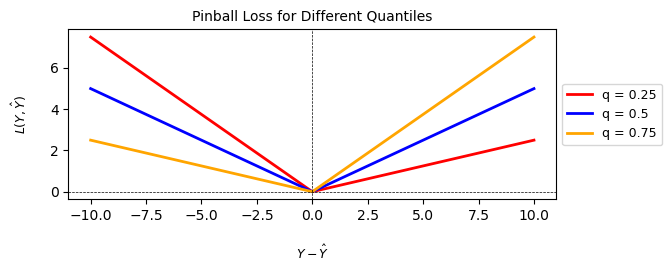

In [26]:
def pinball_loss(y_diff, q):
    return np.where(y_diff >= 0, q * y_diff, (1 - q) * (-y_diff))

y_diff = np.linspace(-10, 10, 1000)
quantiles = [0.25, 0.5, 0.75]

# colors = plt.cm.prism(np.linspace(0, 1, len(quantiles)))
colors = ['red', 'blue', 'orange']

fig, ax = plt.subplots(figsize=(7, 3))

for q, color in zip(quantiles, colors):
    loss = pinball_loss(y_diff, q)
    ax.plot(y_diff, loss, label=f'q = {q}', color=color, linewidth=2)

ax.set_xlabel(r'$Y - \hat{Y}$', fontsize=9)
ax.set_ylabel(r'$L(Y, \hat{Y})$', fontsize=9)
ax.set_title('Pinball Loss for Different Quantiles', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
ax.legend(fontsize=9, loc='center left', bbox_to_anchor=(1, 0.5))

# Hide grid
ax.grid(False)
plt.tight_layout()
plt.show()
